#Introduction 
This basic regression model with tensorflow emulates [Basic Regression Efficiency](https://www.tensorflow.org/tutorials/keras/regression). This is to practice the use of tensorflow for regression problems.

In [ ]:
#Import dependencies for EBA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#import modeling dependencies
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


#Get Data

The data is coming from[UCI Machine Learning Repository]( https://archive.ics.uci.edu/ml/index.php).


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

data=pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

In [ ]:
dataset=data.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


#Data Preprocessing

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset=dataset.dropna() #drop the null values rows to keep the project simple

 One hot the `Origin` column since it is a categorical column

In [ ]:
dataset.Origin.value_counts()

1    245
3     79
2     68
Name: Origin, dtype: int64

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
dataset=pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,1,2,3
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [ ]:
dataset.rename(columns={'1':'USA', '2':'Europe', '3':'Japan'})

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


#Split Data into training and test sets

In [ ]:
train_df=dataset.sample(frac=0.8, random_state=0)
test_df=dataset.drop(train_df.index)

In [ ]:
train_df.shape, test_df.shape

((314, 10), (78, 10))

In [ ]:
train_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,1,2,3
146,28.0,4,90.0,75.0,2125.0,14.5,74,1,0,0
282,22.3,4,140.0,88.0,2890.0,17.3,79,1,0,0
69,12.0,8,350.0,160.0,4456.0,13.5,72,1,0,0
378,38.0,4,105.0,63.0,2125.0,14.7,82,1,0,0
331,33.8,4,97.0,67.0,2145.0,18.0,80,0,0,1


In [ ]:
test_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,1,2,3
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,0,0
25,10.0,8,360.0,215.0,4615.0,14.0,70,1,0,0
28,9.0,8,304.0,193.0,4732.0,18.5,70,1,0,0
31,25.0,4,113.0,95.0,2228.0,14.0,71,0,0,1
33,19.0,6,232.0,100.0,2634.0,13.0,71,1,0,0


#Inspect the data

Lets inspect the data to to see how they relate with one another 


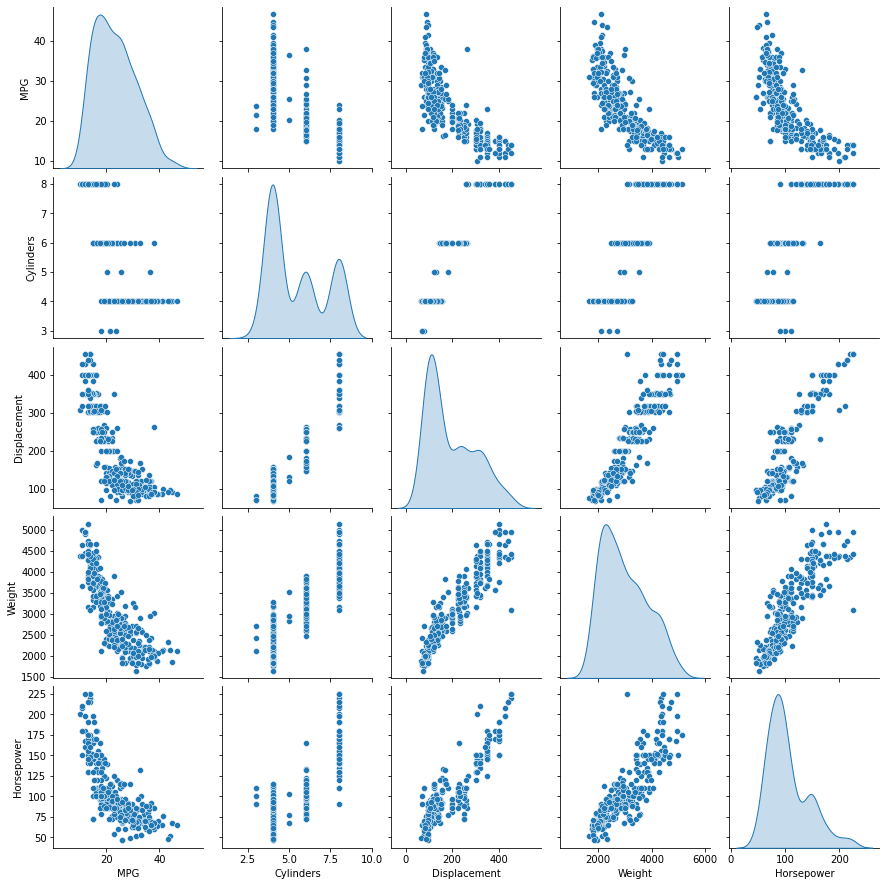

In [ ]:
sns.pairplot(train_df[['MPG', 'Cylinders', 'Displacement', 'Weight', 'Horsepower']], diag_kind='kde' )

In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
1,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
2,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
3,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


### Split Features from Labels

Lets seperate the label we want the model to predict from the features

In [ ]:
train_features=train_df.copy()
test_features=test_df.copy()

train_labels=train_features.pop('MPG')
test_labels=test_features.pop('MPG')

train_labels.shape, test_labels.shape

((314,), (78,))

# Normalization

Lets put all the features on the same scales and ranges

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without feature normalization, normalization makes training much more stable.

Reference:https://www.tensorflow.org/tutorials/keras/regression 


In [ ]:
#lets check out our train data
train_df.describe().T[["mean", "std"]]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
1,0.624204,0.485101
2,0.178344,0.383413
3,0.197452,0.398712


### Create Normalization layer

We can create a normalization layer using the `tf.keras.layers.Normalization`

In [ ]:
#create normalization layer
normalizer=tf.keras.layers.Normalization(axis=-1)

In [ ]:
#fit the layer
normalizer.adapt(np.array(train_features))

In [ ]:
#calculate the mean and variance and store them in the layer
print(normalizer.mean.numpy())

[[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025171e+03
  1.55592356e+01 7.58980942e+01 6.24203861e-01 1.78343967e-01
  1.97452217e-01]]


In [ ]:
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,1,2,3
146,4,90.0,75.0,2125.0,14.5,74,1,0,0
282,4,140.0,88.0,2890.0,17.3,79,1,0,0
69,8,350.0,160.0,4456.0,13.5,72,1,0,0
378,4,105.0,63.0,2125.0,14.7,82,1,0,0
331,4,97.0,67.0,2145.0,18.0,80,0,0,1
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,1,0,0
229,8,400.0,180.0,4220.0,11.1,77,1,0,0
150,4,108.0,93.0,2391.0,15.5,74,0,0,1
145,4,83.0,61.0,2003.0,19.0,74,0,0,1


In [ ]:
#let check it ourt
first=np.array(train_features[:1])
first

array([[4.000e+00, 9.000e+01, 7.500e+01, 2.125e+03, 1.450e+01, 7.400e+01,
        1.000e+00, 0.000e+00, 0.000e+00]])

In [ ]:
with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52  0.78 -0.47 -0.5 ]]


#Linear Regression

We will start by building a single variable linear regress to predit 'MPG' from Horsepower using `tf.keras.Sequential` model. 

In [ ]:
horsepower=np.array(train_features['Horsepower'])
horsepower_normalizer=layers.Normalization(input_shape=[1, ], axis=None)
horsepower_normalizer.adapt(horsepower)

In [ ]:
#build the squential model:
horsepower_model=tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
#lets compile the model
horsepower_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
                         loss='mean_absolute_error')
#fit, remember we are building a single variable linear regression
history=horsepower_model.fit(train_features['Horsepower'],
                             train_labels, 
                             epochs=100,
                             verbose=0,
                             validation_split=0.2)

In [ ]:
#let visualizt models training process
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.802219,4.191867,95
96,3.803370,4.205579,96
97,3.807281,4.204822,97
98,3.802491,4.177525,98
99,3.806932,4.157366,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0,10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

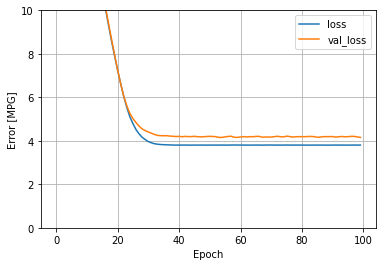

In [ ]:
plot_loss(history)

In [ ]:
#get the results for test set 

test_results={}

test_results['horsepower_model']=horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0
)


In [ ]:
#lets visualize our single variable models as a function of the input
x=tf.linspace(0.0, 250, 251)
y=horsepower_model.predict(x)

In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label="Prediction")
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

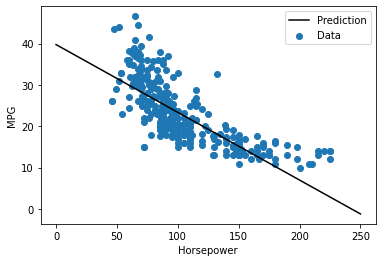

In [ ]:
plot_horsepower(x,y);

# Linear Regression with Multiple Inputs

In [ ]:
#build the model
linear_model=tf.keras.Sequential([
  normalizer,
  layers.Dense(units=1)
])

#compile
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae'
)

#fit
history=linear_model.fit(train_features,
                         train_labels, 
                         epochs=100,
                         verbose=0, 
                         validation_split=0.2)

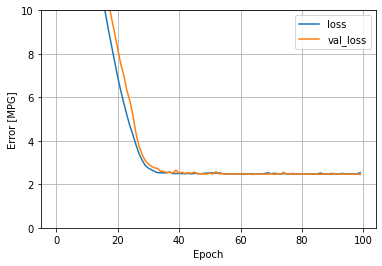

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model']=linear_model.evaluate(
    test_features, test_labels, verbose=0
)

#Regression with Deep Nueral Network (DNN)


In [ ]:
def build_and_compile_model(norm):
  model=keras.Sequential([
    norm, 
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
  #compile
  model.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
#Create a DNN wuth a single input (horsepower)
dnn_horsepower_model=build_and_compile_model(horsepower_normalizer)
dnn_horsepower_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 64)                128       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
#fit the model
%%time
history=dnn_horsepower_model.fit(train_features['Horsepower'],
                                 train_labels,
                                 validation_split=0.2,
                                 verbose=0, epochs=100)

CPU times: user 6.51 s, sys: 279 ms, total: 6.79 s
Wall time: 11.1 s


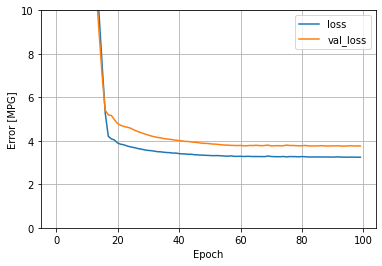

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

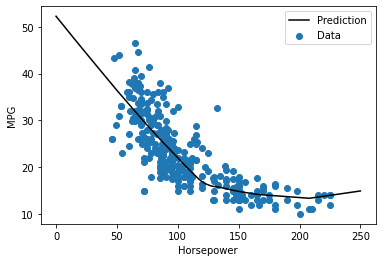

In [ ]:
plot_horsepower(x,y)

In [ ]:
#collect results for later
test_results['dnn_horsepower_model']=dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0
)

#Regression using a DNN and Multiple Inputs

In [ ]:
dnn_model=build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_12 (Dense)            (None, 64)                640       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [ ]:
%%time
history=dnn_model.fit(
    train_features,
    train_labels, 
    validation_split=0.2,
    verbose=0, epochs=100
)

CPU times: user 7.07 s, sys: 269 ms, total: 7.34 s
Wall time: 11.2 s


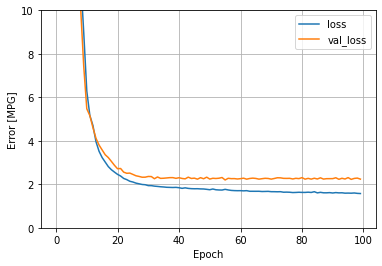

In [ ]:
plot_loss(history)

In [ ]:
#collect results on the test set for later
test_results['dnn_model']=dnn_model.evaluate(test_features, test_labels, verbose=0)

#Performance

In [ ]:
#lets check out all our models performance
pd.DataFrame(test_results, index=['Mean absolute error (MPG']).T

,Mean absolute error (MPG
horsepower_model,3.658262
linear_model,2.431032
dnn_horsepower_model,2.898905
dnn_model,1.700648


# Make predictions

Lets make prediciton with the `dnn_model` on the test set using the Keras `Model.predict`

In [ ]:
test_predictions=dnn_model.predict(test_features).flatten()

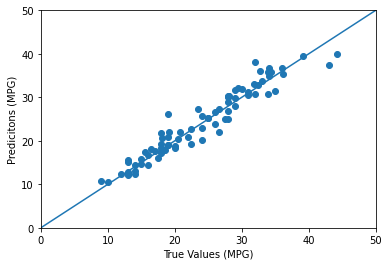

In [ ]:
#a=plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values (MPG)')
plt.ylabel('Predicitons (MPG)')
lims=[0,50]
plt.xlim(lims)
plt.ylim(lims)
_ =plt.plot(lims, lims)

it looks like our model is predicting reasonably well

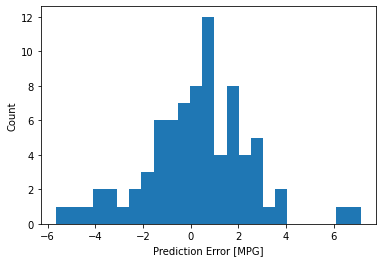

In [ ]:
#let check the error distribution
error=test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ =plt.ylabel('Count')

# Save the model

In [ ]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [ ]:
#reload
reloaded_dnn_model=tf.keras.models.load_model('dnn_model')
test_results['reloaded']=reloaded_dnn_model.evaluate(
    test_features, test_labels, verbose=0
)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG] ']).T

,Mean absolute error [MPG]
horsepower_model,3.658262
linear_model,2.431032
dnn_horsepower_model,2.898905
dnn_model,1.700648
reloaded,1.700648
